这里演示了PCA相关代码操作  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler
% matplotlib inline

In [2]:
def PCA_2d_example():
    '''加载数据并作图'''
    data = spio.loadmat('../data/6-PCA/data.mat')
    X = data['X']
    plt = plot_data_2d(X,'bo')
    plt.axis('square')
    plt.title('original data')
    plt.show()
    '''归一化数据并作图'''
    scaler = StandardScaler()
    scaler.fit(X)
    x_train = scaler.transform(X)
    
    plot_data_2d(x_train, 'bo')
    plt.axis('square')
    plt.title('scaler data')
    plt.show()
    
    '''拟合数据'''
    K=1 # 要降的维度
    model = pca.PCA(n_components=K).fit(x_train)   # 拟合数据，n_components定义要降的维度
    Z = model.transform(x_train)    # transform就会执行降维操作
    
    '''数据恢复并作图'''
    Ureduce = model.components_     # 得到降维用的Ureduce
    x_rec = np.dot(Z,Ureduce)       # 数据恢复
    
    plot_data_2d(x_rec,'bo')
    plt.plot()
    plt.axis('square')
    plt.title('recover data')
    plt.show()

In [3]:
def PCA_face_example():
    '''加载数据并显示'''
    image_data = spio.loadmat('../data/6-PCA/data_faces.mat')
    X = image_data['X']
    display_imageData(X[0:100,:])  # 显示100个最初图像
    
    '''归一化数据'''
    scaler = StandardScaler()
    scaler.fit(X)
    x_train = scaler.transform(X)
    
    '''拟合模型'''
    K=100
    model = pca.PCA(n_components=K).fit(x_train)
    Z = model.transform(x_train)
    Ureduce = model.components_
    
    display_imageData(Ureduce[0:36,:])  # 可视化部分U数据
    x_rec = np.dot(Z,Ureduce)
    
    display_imageData(x_rec[0:100,:])  # 显示恢复的数据

In [4]:
# 可视化二维数据
def plot_data_2d(X,marker):
    plt.plot(X[:,0],X[:,1],marker) 
    return plt


In [5]:
# 显示图片
def display_imageData(imgData):
    sum = 0
    '''
    显示100个数（若是一个一个绘制将会非常慢，可以将要画的图片整理好，放到一个矩阵中，显示这个矩阵即可）
    - 初始化一个二维数组
    - 将每行的数据调整成图像的矩阵，放进二维数组
    - 显示即可
    '''
    m,n = imgData.shape
    width = np.int32(np.round(np.sqrt(n)))
    height = np.int32(n/width);
    rows_count = np.int32(np.floor(np.sqrt(m)))
    cols_count = np.int32(np.ceil(m/rows_count))
    pad = 1
    display_array = -np.ones((pad+rows_count*(height+pad),pad+cols_count*(width+pad)))
    for i in range(rows_count):
        for j in range(cols_count):
            max_val = np.max(np.abs(imgData[sum,:]))
            display_array[pad+i*(height+pad):pad+i*(height+pad)+height,pad+j*(width+pad):pad+j*(width+pad)+width] = imgData[sum,:].reshape(height,width,order="F")/max_val    # order=F指定以列优先，在matlab中是这样的，python中需要指定，默认以行
            sum += 1
            
    plt.imshow(display_array,cmap='gray')   #显示灰度图像
    plt.axis('off')
    plt.show()

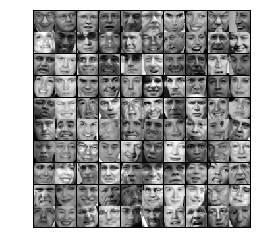

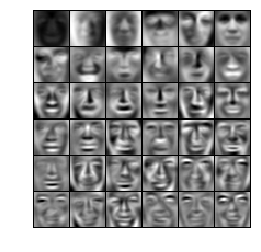

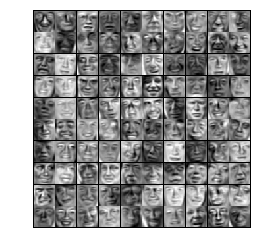

In [6]:
PCA_face_example()

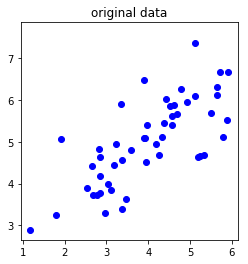

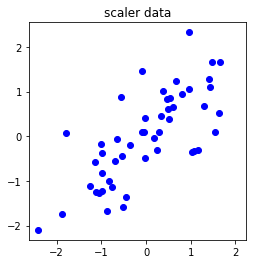

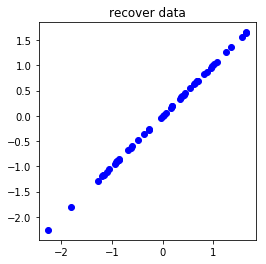

In [7]:
PCA_2d_example()